In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [101]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset (1).csv')

In [102]:
print(df.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [104]:
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [105]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [107]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False)

In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB
None


In [109]:
Sales_category = df.groupby("Category")["Sales"].sum()


In [110]:
# Extract date features
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%B')
df['month_no'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year

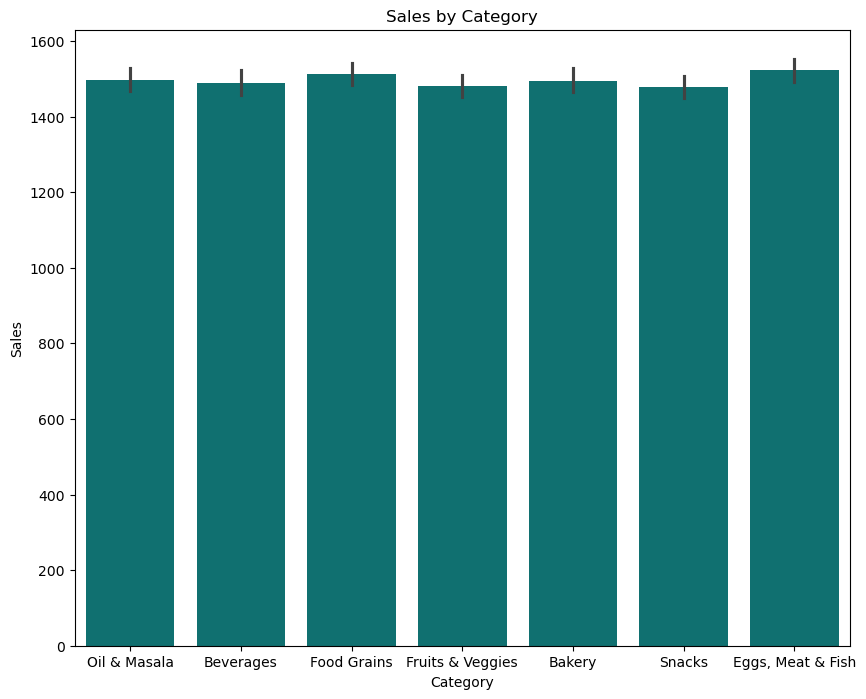

In [111]:
# Sales by Category
plt.figure(figsize=(10,8))
sns.barplot(x='Category', y='Sales', data=df, color='teal')
plt.title('Sales by Category')
plt.show()

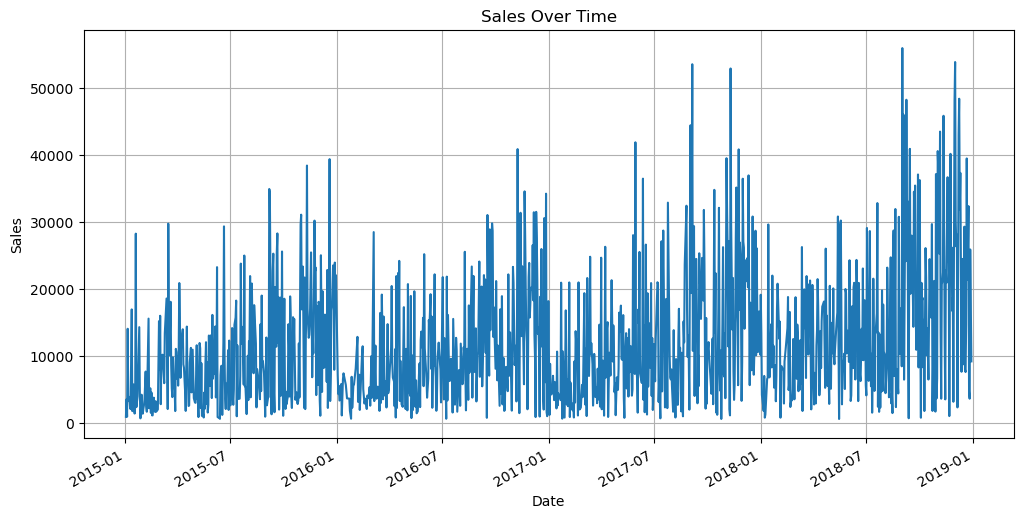

In [112]:
# 2. Sales Over Time
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [113]:
# Sum up sales by month
monthly_sales= df.groupby('Order Month')['Sales'].sum().reset_index()

In [114]:
# Sort the data by month
monthly_sales_sorted=monthly_sales.sort_values(by='Order Month')

<Figure size 1000x600 with 0 Axes>

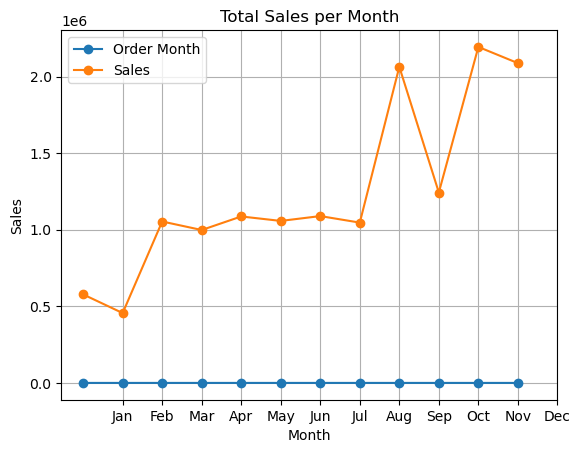

In [115]:
plt.figure(figsize=(10,6))
monthly_sales.plot(marker='o')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Order Month'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

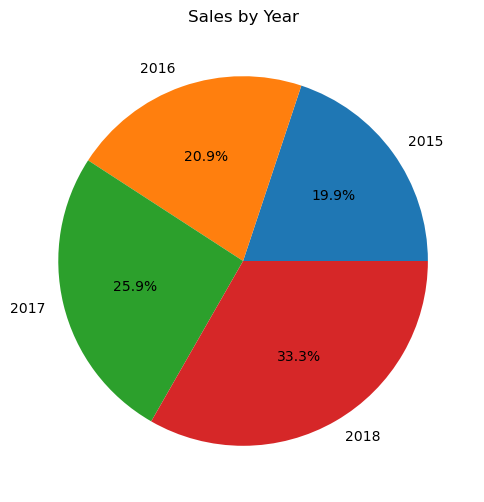

In [116]:
yearly_sales = df.groupby('Order Year')['Sales'].sum()

# Remove negative and NaN sales (if any)
yearly_sales = yearly_sales[yearly_sales > 0].dropna()

# Yearly sales
plt.figure(figsize=(6,6))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

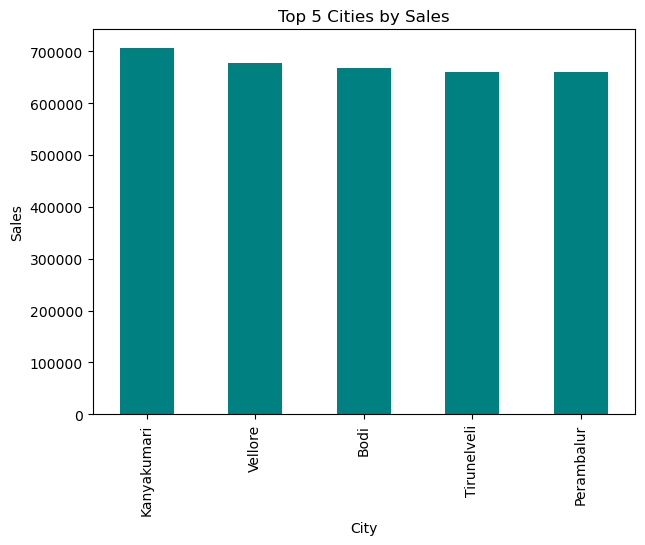

In [117]:
# Top 5 Cities by Sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7,5))
city_sales.plot(kind='bar', color='teal')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

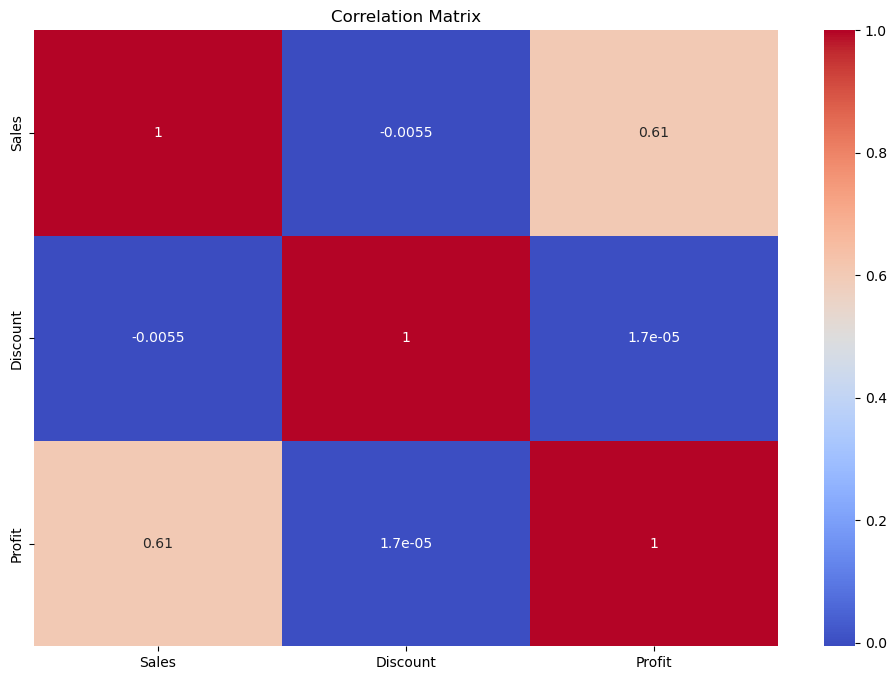

In [118]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [136]:
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State','Month']:
    df[col] = le.fit_transform(df[col])

In [137]:
# Step 5: Feature Selection and Model Building
features = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
target = df['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [138]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [139]:
# Assuming you already trained both models:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)


from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)


In [140]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Value: {r2:.2f}")

Mean Squared Error: 212935.59
R-Squared Value: 0.35


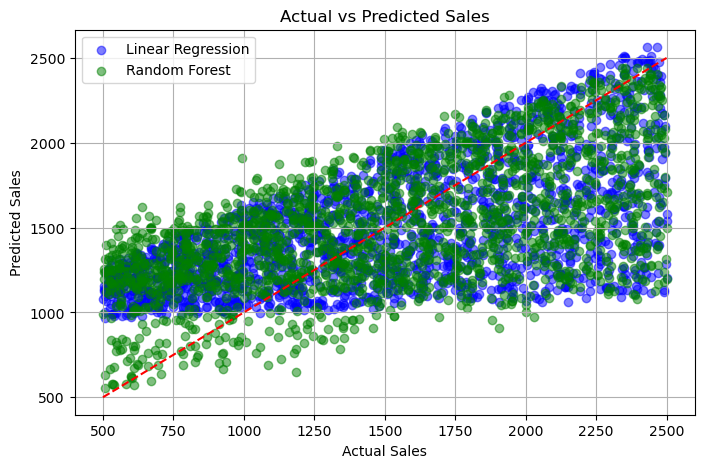

In [141]:
# Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()